In [1]:
from orangecontrib.argument.miner.miner import ArgumentMiner

url = 'https://raw.githubusercontent.com/EyeofBeholder-NLeSC/orange3-argument/main/example/data/data_processed_1prod_sample.json'

In [2]:
miner = ArgumentMiner(url)
miner.load_nlp_pipeline()
miner.load_word_vector_model()
miner.compute_ranks_and_readability()
miner.compute_clusters_and_weights()

In [4]:
miner.compute_edge_table()
miner.compute_node_table()

In [5]:
df_edge = miner.df_edge
df_node = miner.df_node
df_edge['weight'] = (df_edge['weight'] - df_edge['weight'].min()) \
            / (df_edge['weight'].max() - df_edge['weight'].min())

In [6]:
import networkx as nx

G = nx.from_pandas_edgelist(
    df_edge, 
    source='source', target='target', edge_attr=['weight'], 
    create_using=nx.DiGraph())

In [7]:
G.nodes

NodeView((5, 0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 2, 3, 4))

In [13]:
df_node

,argument,score,label
0,Returning these. the pictures on here make the...,1,supportive
1,After using this shoes seven times for regular...,1,supportive
2,After less than a week the sole ripped off on ...,1,supportive
3,wrong shoes,1,supportive
4,"I wore these shoe one time, from the airport i...",1,supportive
5,Color was not at all what i expected. It was ...,2,defeated
6,Tried one in the store and bought it online bu...,2,defeated
7,I've always gotten this size in Nike shoes wit...,2,defeated
8,These shoes are poorly constructed and I don't...,2,defeated
9,Super light and very comfortable. I'm a runner...,3,defeated


c:\Users\qiji1\Workspace\orange3-argument\venv\lib\site-packages\networkx\drawing\layout.py:726: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


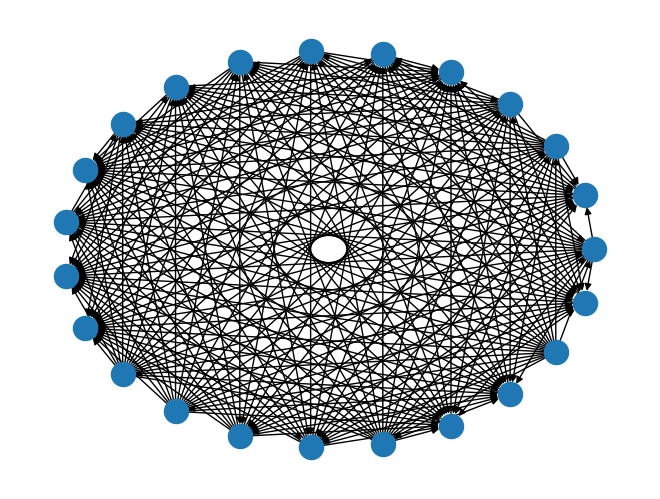

In [30]:
# dist = nx.shortest_path_length(G, weight='weight', method='bellman-ford')
dist = nx.average_shortest_path_length(G, weight='weight', method='bellman-ford')
pos = nx.kamada_kawai_layout(G, dist)
nx.draw(G, pos)

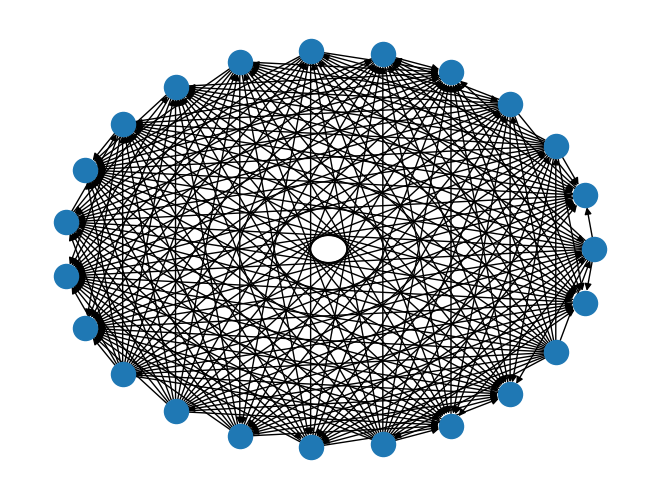

In [28]:
nx.draw(G, pos=pos)

In [15]:
pos

{0: array([-1.        , -0.47916667]),
 1: array([-1.        , -0.23958333]),
 2: array([-1.00000000e+00,  9.25185854e-18]),
 3: array([-1.        ,  0.23958333]),
 4: array([-1.        ,  0.47916667]),
 5: array([ 0.27777778, -0.47916667]),
 6: array([ 0.27777778, -0.42279412]),
 7: array([ 0.27777778, -0.36642157]),
 8: array([ 0.27777778, -0.31004902]),
 9: array([ 0.27777778, -0.25367647]),
 10: array([ 0.27777778, -0.19730392]),
 11: array([ 0.27777778, -0.14093137]),
 12: array([ 0.27777778, -0.08455882]),
 13: array([ 0.27777778, -0.02818627]),
 14: array([0.27777778, 0.02818627]),
 15: array([0.27777778, 0.08455882]),
 16: array([0.27777778, 0.14093137]),
 17: array([0.27777778, 0.19730392]),
 18: array([0.27777778, 0.25367647]),
 19: array([0.27777778, 0.31004902]),
 20: array([0.27777778, 0.36642157]),
 21: array([0.27777778, 0.42279412]),
 22: array([0.27777778, 0.47916667])}

In [18]:
G.add_nodes_from(miner.df_node.iloc[~miner.df_node.index.isin(G.nodes)].index.tolist())

In [19]:
G.nodes

NodeView((3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 0, 1, 2, 4))

In [20]:
G.edges

OutEdgeView([(3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22)])

In [21]:
pos_dict = nx.spring_layout(G, k=1/11.0, seed=10)
pos_dict

{3: array([nan, nan]),
 5: array([nan, nan]),
 6: array([nan, nan]),
 7: array([nan, nan]),
 8: array([nan, nan]),
 9: array([nan, nan]),
 10: array([nan, nan]),
 11: array([nan, nan]),
 12: array([nan, nan]),
 13: array([nan, nan]),
 14: array([nan, nan]),
 15: array([nan, nan]),
 16: array([nan, nan]),
 17: array([nan, nan]),
 18: array([nan, nan]),
 19: array([nan, nan]),
 20: array([nan, nan]),
 21: array([nan, nan]),
 22: array([nan, nan]),
 0: array([nan, nan]),
 1: array([nan, nan]),
 2: array([nan, nan]),
 4: array([nan, nan])}

In [114]:
pip list

Package                  Version     Editable project location
------------------------ ----------- -----------------------------------------
anyio                    3.6.2
AnyQt                    0.2.0
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
backcall                 0.2.0
baycomp                  1.0.2
beautifulsoup4           4.11.1
bleach                   5.0.1
blis                     0.7.9
Bottleneck               1.3.5
CacheControl             0.12.11
catalogue                2.0.8
certifi                  2022.12.7
cffi                     1.15.1
chardet                  5.1.0
charset-normalizer       3.0.1
click                    8.1.3
colorama                 0.4.6
comm                     0.1.2
commonmark               0.9.1
confection               0.0.4
contourpy                1.0.7
cycler                   0.11.0
cymem                    2.0.7
Cython   


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip
